In [1]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Xd=pd.read_csv('SurveyAnswers4ClusteringUpdated2023_ALLCATEGORICAL.csv')
Xd

,CDR_name,rest_api,another_api,gui,comp_crud_api,ehr_cr_api,store_list_get_templates_api,store_list_exec_query_api,comp_crud_gui,ehr_cr_gui,...,fhir_import,demographics_openehr,rest_api_openehr,gdl,form_creation,terminology_server,archetype_designer,template_designer,aql,sql
0,ehrbase,y,y,y,y,y,y,y,n,n,...,y,n,y,n,n,y,n,n,y,n
1,better,y,y,y,y,y,y,y,y,n,...,y,n,y,y,y,y,y,y,y,n
2,base24,y,y,y,y,y,y,y,y,y,...,y,y,n,n,y,y,n,n,n,n
3,cabo,y,y,y,y,y,all but store,y not store,only r,y,...,ext,n,dev,n,n,n,n,n,n,n
4,arenaehr,y,n,y,y,y,y,y,n,n,...,y,n,y,y,y,y,n,n,y,n
5,eweave,n,n,y,n,n,n,n,y,y,...,n,y,n,n,y,y,n,y,y,y
6,ehrcare,y,y,n,y,y,y,y not store,n,n,...,n,y,n,n,y,n,n,n,y,n
7,clever,y,y,y,y,y,y,y,n,y,...,n,y,n,y,y,dev,y,y,n,y
8,ehrdb,y,y,y,y,y,y,y,y,n,...,n,n,y,n,y,n,y,y,y,n
9,rhp,y,y,y,y,y,y,y,n,y,...,n,y,n,y,y,y,y,y,n,y


In [3]:
Xd.drop(['CDR_name'],axis=1,inplace=True)
Xd.shape

(11, 35)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 129.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 129.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 114.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 97.0
Run 2, iteration: 2/100, moves: 2, cost: 91.0
Run 2, iteration: 3/100, moves: 1, cost: 86.

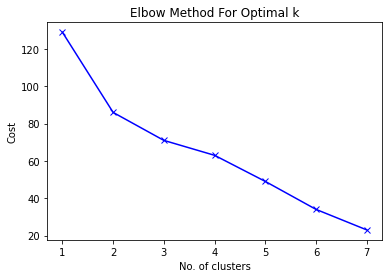

In [6]:
# Elbow curve to find optimal K
cost = []
K = range(1,8)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(Xd)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.savefig('test_kmodes_elbow_NoNone_ALLVAR_elbow_1000dpi.pdf',dpi=1000,format='pdf')
plt.show()

In [5]:
# Building the model with 4 clusters
kmode = KModes(n_clusters=4,init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(Xd)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 63.0
Run 1, iteration: 2/100, moves: 0, cost: 63.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 60.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 59.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 64.0
Run 4, iteration: 2/100, moves: 0, cost: 64.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 90.0
Run 5, iteration: 2/100, moves: 0, cost: 90.0
Best run was number 3


array([3, 2, 3, 3, 3, 0, 3, 1, 2, 1, 3], dtype=uint16)

In [6]:
Xd.insert(0, "Cluster", clusters, True)
Xd

,Cluster,rest_api,another_api,gui,comp_crud_api,ehr_cr_api,store_list_get_templates_api,store_list_exec_query_api,comp_crud_gui,ehr_cr_gui,...,fhir_import,demographics_openehr,rest_api_openehr,gdl,form_creation,terminology_server,archetype_designer,template_designer,aql,sql
0,0,y,y,y,y,y,y,y,n,n,...,y,n,y,n,n,y,n,n,y,n
1,0,y,y,y,y,y,y,y,y,n,...,y,n,y,y,y,y,y,y,y,n
2,0,y,y,y,y,y,y,y,y,y,...,y,y,n,n,y,y,n,n,n,n
3,3,y,y,y,y,y,all but store,y not store,only r,y,...,ext,n,dev,n,n,n,n,n,n,n
4,0,y,n,y,y,y,y,y,n,n,...,y,n,y,y,y,y,n,n,y,n
5,1,n,n,y,n,n,n,n,y,y,...,n,y,n,n,y,y,n,y,y,y
6,0,y,y,n,y,y,y,y not store,n,n,...,n,y,n,n,y,n,n,n,y,n
7,2,y,y,y,y,y,y,y,n,y,...,n,y,n,y,y,dev,y,y,n,y
8,0,y,y,y,y,y,y,y,y,n,...,n,n,y,n,y,n,y,y,y,n
9,2,y,y,y,y,y,y,y,n,y,...,n,y,n,y,y,y,y,y,n,y


In [7]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3,init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(Xd)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 77.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 82.0
Run 2, iteration: 2/100, moves: 0, cost: 82.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 78.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 72.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 77.0
Best run was number 4


array([2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2], dtype=uint16)

In [8]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2,init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(Xd)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 88.0
Run 1, iteration: 2/100, moves: 0, cost: 88.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1, cost: 116.0
Run 2, iteration: 2/100, moves: 0, cost: 116.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 117.0
Run 3, iteration: 2/100, moves: 0, cost: 117.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 118.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 88.0
Best run was number 1


array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1], dtype=uint16)

In [9]:
# Building the model with 5 clusters
kmode = KModes(n_clusters=5,init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(Xd)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 67.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 65.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 47.0
Run 3, iteration: 2/100, moves: 0, cost: 47.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 63.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 74.0
Best run was number 3


array([4, 4, 3, 3, 4, 0, 1, 2, 4, 2, 4], dtype=uint16)

In [10]:
def find_all_clus(clus,m):
  #find all possible clus to compare against
  listofclus=[]

  clus_copy=[x for x in clus]
  for i in range(m):
#    print(f'------i={i}')
    templist=[]
    for j in range(m):
#      print(f'-----------j={j}')
      #find and change all the i to m+j
      if i==0: #first number. no previous lists
        templist.append(replace(clus_copy,i,m+j))
#        print(f't1 {templist}')        
      else:#compare to previous lists
        for o in listofclus:
#          print(f'o {o}')
          if m+j not in o:
            templist.append(replace(o,i,m+j))    
#            print(f't2 {templist}')
    listofclus=[x for x in templist]
#    print(f't3 {listofclus}')

    #transform it back to lower numbers
    final_list=[]
    for l in listofclus:
      newl=[x-m for x in l]
      final_list.append(newl)
  return final_list 


def replace(clus,i,k):
  clus_copy=[k if x==i else x for x in clus ]
  return clus_copy


def checkunique(clus,uniqueclustering,m,eveniences):
  #find all possible clus to compare against
  listofclus=find_all_clus(clus,m)

  for l in listofclus:
#    print(f'l={l} unique={uniqueclustering} eveniences={eveniences}')
    if l in uniqueclustering:      
      eveniences[uniqueclustering.index(l)]+=1
#      print(f'eveniences={eveniences}')
      return uniqueclustering,eveniences
  uniqueclustering.append(clus)
  eveniences.append(1)
  return uniqueclustering,eveniences


In [ ]:
# Building the model with n clusters
for nclusters in range(2,9):
    uniqueclustering=[]
    eveniences=[]
    for i in range(10000):
        kmode = KModes(n_clusters=nclusters,init = "random", n_init = 5, verbose=0)
        clusters = kmode.fit_predict(Xd)
        uniqueclustering,eveniences=checkunique(list(clusters),uniqueclustering,nclusters,eveniences)
    print(f'nclusters={nclusters}')
    print(f'top 5 clustering={sorted(zip(eveniences,uniqueclustering), reverse=True)[:5]}')

nclusters=2
top 5 clustering=[(9938, [0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0]), (46, [1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0]), (7, [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0]), (3, [1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]), (2, [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1])]
nclusters=3
top 5 clustering=[(4220, [1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1]), (2779, [1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1]), (585, [0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 0]), (517, [2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0]), (370, [1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1])]
nclusters=4
top 5 clustering=[(1884, [1, 0, 3, 3, 1, 2, 1, 2, 0, 2, 1]), (1816, [1, 0, 1, 1, 1, 3, 1, 2, 0, 2, 1]), (856, [1, 1, 0, 0, 1, 3, 1, 2, 1, 2, 1]), (785, [3, 3, 0, 0, 2, 1, 2, 1, 3, 1, 2]), (506, [2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 3])]
nclusters=5
top 5 clustering=[(1904, [3, 0, 2, 2, 3, 1, 3, 4, 0, 4, 3]), (791, [0, 4, 1, 1, 0, 2, 0, 3, 4, 3, 2]), (558, [0, 0, 2, 2, 0, 3, 0, 4, 0, 4, 1]), (526, [4, 0, 1, 1, 4, 2, 3, 2, 0, 2, 4]), (504, [4, 4, 2, 2, 0, 3, 0, 1, 4, 1, 0])]
nclusters=6
top 5 clustering=[(832, [4, 2

In [59]:
    nclusters=7
    for i in range(1000):
        kmode = KModes(n_clusters=nclusters,init = "random", n_init = 5, verbose=0)
        clusters = kmode.fit_predict(Xd)
        uniqueclustering,eveniences=checkunique(list(clusters),uniqueclustering,nclusters,eveniences)
    print(f'nclusters={nclusters}')
    print(f'top 10 clustering={sorted(zip(eveniences,uniqueclustering), reverse=True)[:10]}')

nclusters=7
top 10 clustering=[(380, [0, 4, 5, 1, 0, 6, 0, 3, 4]), (195, [1, 0, 2, 3, 6, 2, 1, 4, 0]), (194, [3, 1, 6, 2, 0, 6, 7, 4, 1]), (182, [0, 7, 5, 6, 3, 1, 0, 2, 7]), (152, [7, 5, 6, 2, 7, 3, 0, 1, 5]), (133, [2, 5, 0, 1, 2, 0, 4, 6, 5]), (122, [2, 2, 1, 4, 7, 1, 3, 0, 2]), (110, [4, 4, 2, 1, 4, 3, 5, 0, 4]), (110, [3, 1, 0, 2, 0, 5, 3, 4, 1]), (85, [0, 0, 4, 1, 6, 7, 2, 5, 0])]
